# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

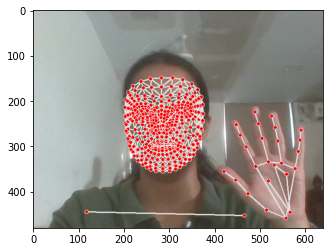

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.44780603,  0.53075904, -1.4782213 , ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
# 468*3+33*4+21*3+21*3

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.44780603,  0.53075904, -1.4782213 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [69]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no'])

# Forty videos worth of data
no_sequences = 40

# Videos are going to be 40 frames in length
sequence_length = 40

In [ ]:
# hello
# thanks
# I love you
# yes
# no

In [70]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [71]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [73]:
label_map = {label:num for num, label in enumerate(actions)}

In [74]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'yes': 3, 'no': 4}

In [75]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(200, 40, 1662)

In [29]:
np.array(labels).shape

(200,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(200, 40, 1662)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(10, 5)

# 7. Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(40,1662)))
model.add(LSTM(128, return_sequences=True, activation='sigmoid'))
model.add(LSTM(64, return_sequences=False, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [49]:
res = [.7, 0.2, 0.1]

In [50]:
actions[np.argmax(res)]

'hello'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
6/6 [==============================] - 5s 254ms/step - loss: 2.2169 - categorical_accuracy: 0.1869
Epoch 2/1000
6/6 [==============================] - 1s 121ms/step - loss: 1.9863 - categorical_accuracy: 0.1685
Epoch 3/1000
6/6 [==============================] - 1s 114ms/step - loss: 1.7526 - categorical_accuracy: 0.2013
Epoch 4/1000
6/6 [==============================] - 1s 109ms/step - loss: 1.6631 - categorical_accuracy: 0.2176
Epoch 5/1000
6/6 [==============================] - 1s 110ms/step - loss: 1.6406 - categorical_accuracy: 0.1856
Epoch 6/1000
6/6 [==============================] - 1s 109ms/step - loss: 1.6238 - categorical_accuracy: 0.2248
Epoch 7/1000
6/6 [==============================] - 1s 111ms/step - loss: 1.6107 - categorical_accuracy: 0.2198
Epoch 8/1000
6/6 [==============================] - 1s 110ms/step - loss: 1.6083 - categorical_accuracy: 0.2178
Epoch 9/1000
6/6 [==============================] - 1s 113ms/step - loss: 1.6121 - categorical_accuracy:

6/6 [==============================] - 1s 125ms/step - loss: 1.6044 - categorical_accuracy: 0.3870
Epoch 74/1000
6/6 [==============================] - 1s 125ms/step - loss: 1.5996 - categorical_accuracy: 0.2155
Epoch 75/1000
6/6 [==============================] - 1s 125ms/step - loss: 1.5928 - categorical_accuracy: 0.2305
Epoch 76/1000
6/6 [==============================] - 1s 127ms/step - loss: 1.5671 - categorical_accuracy: 0.2169
Epoch 77/1000
6/6 [==============================] - 1s 128ms/step - loss: 1.5101 - categorical_accuracy: 0.4050
Epoch 78/1000
6/6 [==============================] - 1s 125ms/step - loss: 1.4351 - categorical_accuracy: 0.3974
Epoch 79/1000
6/6 [==============================] - 1s 125ms/step - loss: 1.3674 - categorical_accuracy: 0.4070
Epoch 80/1000
6/6 [==============================] - 1s 128ms/step - loss: 1.3009 - categorical_accuracy: 0.4348
Epoch 81/1000
6/6 [==============================] - 1s 128ms/step - loss: 1.2880 - categorical_accuracy: 0.38

6/6 [==============================] - 1s 136ms/step - loss: 1.1069 - categorical_accuracy: 0.4309
Epoch 146/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.0765 - categorical_accuracy: 0.4250
Epoch 147/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.1251 - categorical_accuracy: 0.4435
Epoch 148/1000
6/6 [==============================] - 1s 146ms/step - loss: 1.0843 - categorical_accuracy: 0.4316
Epoch 149/1000
6/6 [==============================] - 1s 146ms/step - loss: 1.1145 - categorical_accuracy: 0.3820
Epoch 150/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.0809 - categorical_accuracy: 0.3723
Epoch 151/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.1158 - categorical_accuracy: 0.4124
Epoch 152/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.0831 - categorical_accuracy: 0.4026
Epoch 153/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.1275 - categorical_accura

Epoch 217/1000
6/6 [==============================] - 1s 166ms/step - loss: 1.0872 - categorical_accuracy: 0.4000
Epoch 218/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.0639 - categorical_accuracy: 0.4328
Epoch 219/1000
6/6 [==============================] - 1s 131ms/step - loss: 1.1030 - categorical_accuracy: 0.4024
Epoch 220/1000
6/6 [==============================] - 1s 128ms/step - loss: 1.0918 - categorical_accuracy: 0.4042
Epoch 221/1000
6/6 [==============================] - 1s 190ms/step - loss: 1.1421 - categorical_accuracy: 0.3991
Epoch 222/1000
6/6 [==============================] - 1s 219ms/step - loss: 1.1516 - categorical_accuracy: 0.3994
Epoch 223/1000
6/6 [==============================] - 1s 193ms/step - loss: 1.1461 - categorical_accuracy: 0.3674
Epoch 224/1000
6/6 [==============================] - 1s 194ms/step - loss: 1.1200 - categorical_accuracy: 0.4096
Epoch 225/1000
6/6 [==============================] - 1s 197ms/step - loss: 1.0573 - cat

6/6 [==============================] - 1s 136ms/step - loss: 1.0919 - categorical_accuracy: 0.4058
Epoch 289/1000
6/6 [==============================] - 1s 132ms/step - loss: 1.0666 - categorical_accuracy: 0.4553
Epoch 290/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.0384 - categorical_accuracy: 0.4525
Epoch 291/1000
6/6 [==============================] - 1s 134ms/step - loss: 1.0666 - categorical_accuracy: 0.4167
Epoch 292/1000
6/6 [==============================] - 1s 138ms/step - loss: 1.0920 - categorical_accuracy: 0.4424
Epoch 293/1000
6/6 [==============================] - 1s 193ms/step - loss: 1.0964 - categorical_accuracy: 0.4325
Epoch 294/1000
6/6 [==============================] - 1s 142ms/step - loss: 2.2259 - categorical_accuracy: 0.2302
Epoch 295/1000
6/6 [==============================] - 1s 133ms/step - loss: 2.3579 - categorical_accuracy: 0.1427
Epoch 296/1000
6/6 [==============================] - 1s 135ms/step - loss: 2.0919 - categorical_accura

Epoch 360/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.6084 - categorical_accuracy: 0.2229
Epoch 361/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.6093 - categorical_accuracy: 0.2039
Epoch 362/1000
6/6 [==============================] - 1s 135ms/step - loss: 1.6112 - categorical_accuracy: 0.2134
Epoch 363/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.6105 - categorical_accuracy: 0.1636
Epoch 364/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.6076 - categorical_accuracy: 0.2397
Epoch 365/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.6084 - categorical_accuracy: 0.2258
Epoch 366/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.6104 - categorical_accuracy: 0.1850
Epoch 367/1000
6/6 [==============================] - 1s 140ms/step - loss: 1.6096 - categorical_accuracy: 0.2211
Epoch 368/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.6088 - cat

6/6 [==============================] - 1s 146ms/step - loss: 1.6111 - categorical_accuracy: 0.1825
Epoch 432/1000
6/6 [==============================] - 1s 143ms/step - loss: 1.6101 - categorical_accuracy: 0.2267
Epoch 433/1000
6/6 [==============================] - 1s 150ms/step - loss: 1.6090 - categorical_accuracy: 0.2005
Epoch 434/1000
6/6 [==============================] - 1s 143ms/step - loss: 1.6098 - categorical_accuracy: 0.2002
Epoch 435/1000
6/6 [==============================] - 1s 149ms/step - loss: 1.6093 - categorical_accuracy: 0.1473
Epoch 436/1000
6/6 [==============================] - 1s 143ms/step - loss: 1.6081 - categorical_accuracy: 0.2090
Epoch 437/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.6081 - categorical_accuracy: 0.2391
Epoch 438/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.6062 - categorical_accuracy: 0.2188
Epoch 439/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.6095 - categorical_accura

Epoch 503/1000
6/6 [==============================] - 1s 143ms/step - loss: 1.1606 - categorical_accuracy: 0.3724
Epoch 504/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.1230 - categorical_accuracy: 0.4005
Epoch 505/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.1337 - categorical_accuracy: 0.4047
Epoch 506/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.1349 - categorical_accuracy: 0.3384
Epoch 507/1000
6/6 [==============================] - 1s 136ms/step - loss: 1.0902 - categorical_accuracy: 0.3747
Epoch 508/1000
6/6 [==============================] - 1s 139ms/step - loss: 1.1677 - categorical_accuracy: 0.3755
Epoch 509/1000
6/6 [==============================] - 1s 149ms/step - loss: 1.0961 - categorical_accuracy: 0.4112
Epoch 510/1000
6/6 [==============================] - 1s 146ms/step - loss: 1.0802 - categorical_accuracy: 0.4229
Epoch 511/1000
6/6 [==============================] - 1s 153ms/step - loss: 1.0990 - cat

6/6 [==============================] - 1s 132ms/step - loss: 1.0630 - categorical_accuracy: 0.4228
Epoch 575/1000
6/6 [==============================] - 1s 173ms/step - loss: 1.0532 - categorical_accuracy: 0.4521
Epoch 576/1000
6/6 [==============================] - 1s 197ms/step - loss: 1.0968 - categorical_accuracy: 0.4324
Epoch 577/1000
6/6 [==============================] - 1s 135ms/step - loss: 1.0916 - categorical_accuracy: 0.4064
Epoch 578/1000
6/6 [==============================] - 1s 131ms/step - loss: 1.1085 - categorical_accuracy: 0.4214
Epoch 579/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.1113 - categorical_accuracy: 0.4234
Epoch 580/1000
6/6 [==============================] - 1s 134ms/step - loss: 1.1024 - categorical_accuracy: 0.4078
Epoch 581/1000
6/6 [==============================] - 1s 133ms/step - loss: 1.0774 - categorical_accuracy: 0.4203
Epoch 582/1000
6/6 [==============================] - 1s 130ms/step - loss: 1.1154 - categorical_accura

Epoch 646/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.9069 - categorical_accuracy: 0.5867
Epoch 647/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.9299 - categorical_accuracy: 0.5785
Epoch 648/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.8365 - categorical_accuracy: 0.6012
Epoch 649/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.9545 - categorical_accuracy: 0.5434
Epoch 650/1000
6/6 [==============================] - 1s 128ms/step - loss: 1.0433 - categorical_accuracy: 0.4932
Epoch 651/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.9155 - categorical_accuracy: 0.5511
Epoch 652/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.8109 - categorical_accuracy: 0.6203
Epoch 653/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.7782 - categorical_accuracy: 0.6199
Epoch 654/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.8179 - cat

6/6 [==============================] - 1s 129ms/step - loss: 0.6277 - categorical_accuracy: 0.6913
Epoch 718/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.6252 - categorical_accuracy: 0.6908
Epoch 719/1000
6/6 [==============================] - 1s 133ms/step - loss: 0.6714 - categorical_accuracy: 0.6584
Epoch 720/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.6873 - categorical_accuracy: 0.6142
Epoch 721/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.6499 - categorical_accuracy: 0.6800
Epoch 722/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.6226 - categorical_accuracy: 0.7489
Epoch 723/1000
6/6 [==============================] - 1s 140ms/step - loss: 0.6165 - categorical_accuracy: 0.7153
Epoch 724/1000
6/6 [==============================] - 1s 165ms/step - loss: 0.6073 - categorical_accuracy: 0.7231
Epoch 725/1000
6/6 [==============================] - 1s 177ms/step - loss: 0.6060 - categorical_accura

Epoch 789/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.5025 - categorical_accuracy: 0.7627
Epoch 790/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.5330 - categorical_accuracy: 0.7883
Epoch 791/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.5339 - categorical_accuracy: 0.7932
Epoch 792/1000
6/6 [==============================] - 1s 134ms/step - loss: 0.4955 - categorical_accuracy: 0.8103
Epoch 793/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.5316 - categorical_accuracy: 0.7581
Epoch 794/1000
6/6 [==============================] - 1s 138ms/step - loss: 0.4790 - categorical_accuracy: 0.7708
Epoch 795/1000
6/6 [==============================] - 1s 141ms/step - loss: 0.4967 - categorical_accuracy: 0.7946
Epoch 796/1000
6/6 [==============================] - 1s 138ms/step - loss: 0.4786 - categorical_accuracy: 0.7996
Epoch 797/1000
6/6 [==============================] - 1s 133ms/step - loss: 0.5341 - cat

6/6 [==============================] - 1s 153ms/step - loss: 0.4356 - categorical_accuracy: 0.8275
Epoch 861/1000
6/6 [==============================] - 1s 150ms/step - loss: 0.4156 - categorical_accuracy: 0.8070
Epoch 862/1000
6/6 [==============================] - 1s 139ms/step - loss: 0.3772 - categorical_accuracy: 0.8586
Epoch 863/1000
6/6 [==============================] - 1s 136ms/step - loss: 0.3747 - categorical_accuracy: 0.8596
Epoch 864/1000
6/6 [==============================] - 1s 160ms/step - loss: 0.3868 - categorical_accuracy: 0.8192
Epoch 865/1000
6/6 [==============================] - 1s 136ms/step - loss: 0.3765 - categorical_accuracy: 0.8755
Epoch 866/1000
6/6 [==============================] - 1s 136ms/step - loss: 0.3999 - categorical_accuracy: 0.8640
Epoch 867/1000
6/6 [==============================] - 1s 148ms/step - loss: 0.3845 - categorical_accuracy: 0.8515
Epoch 868/1000
6/6 [==============================] - 1s 148ms/step - loss: 0.3761 - categorical_accura

Epoch 932/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.3362 - categorical_accuracy: 0.8355
Epoch 933/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.4030 - categorical_accuracy: 0.8325
Epoch 934/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.2498 - categorical_accuracy: 0.9239
Epoch 935/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.3428 - categorical_accuracy: 0.8666
Epoch 936/1000
6/6 [==============================] - 1s 130ms/step - loss: 0.3168 - categorical_accuracy: 0.8732
Epoch 937/1000
6/6 [==============================] - 1s 131ms/step - loss: 0.2699 - categorical_accuracy: 0.9056
Epoch 938/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.3603 - categorical_accuracy: 0.8594
Epoch 939/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.2791 - categorical_accuracy: 0.8859
Epoch 940/1000
6/6 [==============================] - 1s 128ms/step - loss: 0.3810 - cat

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 40, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 40, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
________________________________________________

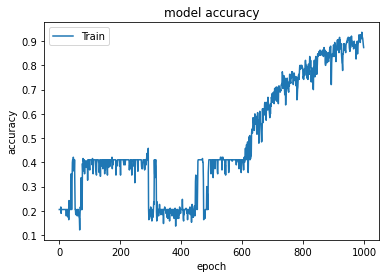

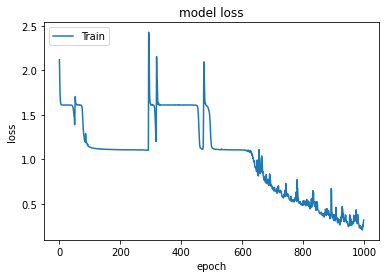

In [54]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 8. Make Predictions

In [56]:
res = model.predict(X_test)

In [57]:
actions[np.argmax(res[4])]

'iloveyou'

In [58]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [59]:
model.save('action.h5')

In [ ]:
# del model

In [60]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [62]:
yhat = model.predict(X_test)

In [63]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[8, 0],
        [1, 1]],

       [[9, 0],
        [0, 1]],

       [[7, 2],
        [0, 1]],

       [[7, 1],
        [0, 2]],

       [[6, 0],
        [2, 2]]], dtype=int64)

In [65]:
accuracy_score(ytrue, yhat)

0.7

# 11. Test in Real Time

In [66]:
colors = [(245,117,16), (117,245,16), (16,117,245), (255,255,0), (0,128,128)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

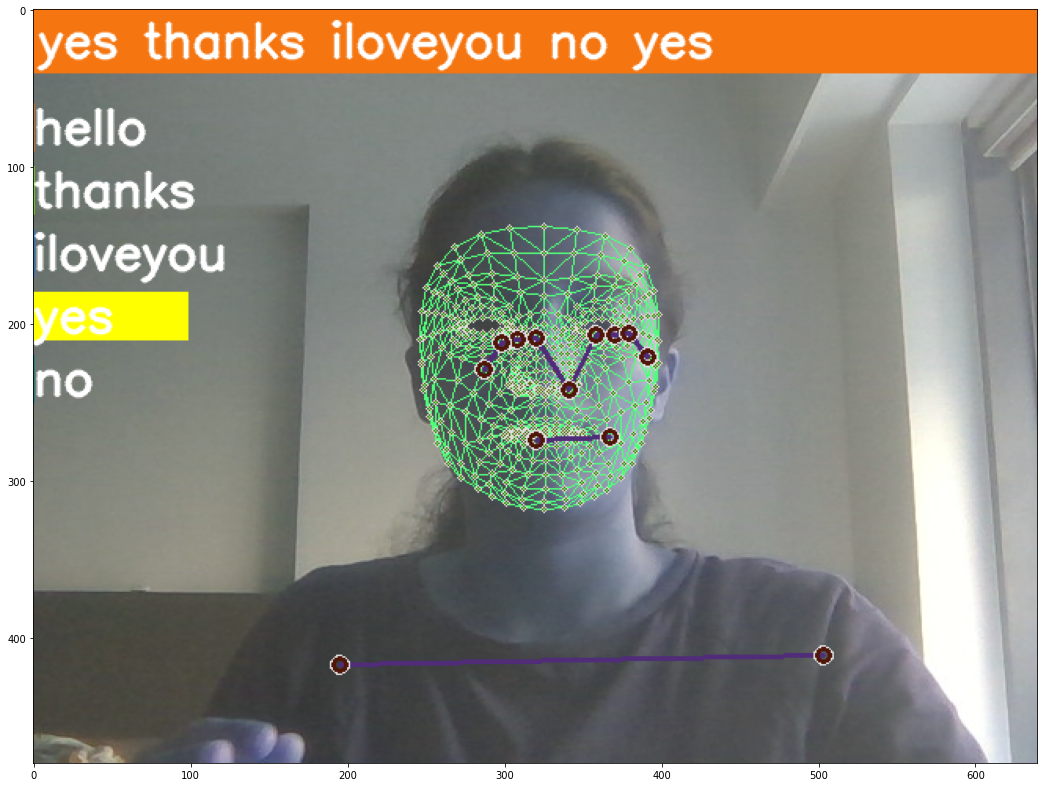

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
sequence.reverse()

In [59]:
len(sequence)

40

In [61]:
sequence.append('def')

In [62]:
sequence.reverse()

In [63]:
sequence[-40:]

[array([ 0.53787142,  0.51002622, -1.00232315, ...,  0.24965377,
         0.23857747, -0.03038098]),
 array([ 0.53764242,  0.51003593, -1.05904651, ...,  0.24914721,
         0.23958413, -0.03409213]),
 array([ 0.53762287,  0.51004624, -1.01094353, ...,  0.25015241,
         0.24019291, -0.03434913]),
 array([ 0.53761923,  0.50995642, -0.98595035, ...,  0.25302282,
         0.24181481, -0.03198131]),
 array([ 0.5376125 ,  0.5098573 , -0.98553216, ...,  0.27022201,
         0.24957711, -0.03170929]),
 array([ 0.53757155,  0.50986022, -1.02683866, ...,  0.31982252,
         0.28670868, -0.0326493 ]),
 array([ 0.53876793,  0.509004  , -1.04410696, ...,  0.33500937,
         0.29973176, -0.02600005]),
 array([ 0.54064971,  0.50853163, -1.04230762, ...,  0.33510736,
         0.30095679, -0.02992666]),
 array([ 0.54184806,  0.50845736, -1.04017437, ...,  0.3261036 ,
         0.29347116, -0.03485176]),
 array([ 0.54184425,  0.50864971, -1.03992987, ...,  0.30672207,
         0.27816701, -0.03

In [68]:

import tkinter as tk
import subprocess
from PIL import Image, ImageTk , ImageOps

root = tk.Tk()
root.title("Sign Language Translator")
img = Image.open("C:/Users/kaanc/Desktop/bg.png") # replace "E:/programming/bg.jpg" with the name of your image file
img = ImageOps.fit(img, (400, 400), Image.Resampling.LANCZOS)
img = ImageTk.PhotoImage(img)
root.geometry("800x600") # set the size of the window to 600x600

background_label = tk.Label(root, image=img)
background_label.place(x=0, y=0)
background_label.pack(fill='both', expand='yes')

start_button = tk.Button(root, text="Start Recognizing", bg='#1775a9', fg='white', font=('Arial', 16), width=20, height=2, relief=tk.GROOVE)

def start_recognizing():
    colors = [(245,117,16), (117,245,16), (16,117,245),(255,255,0),(0,128,128)]
    def prob_viz(res, actions, input_frame, colors):
        output_frame = input_frame.copy()
        for num, prob in enumerate(res):
            cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
            cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        return output_frame
    sequence = []
    sentence = []
    threshold = 0.8

    cap = cv2.VideoCapture(0)
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)
        
            # Draw landmarks
            draw_styled_landmarks(image, results)
        
            # 2. Prediction logic
            keypoints = extract_keypoints(results)
#           sequence.insert(0,keypoints)
#           sequence = sequence[:30]
            sequence.append(keypoints)
            sequence = sequence[-40:]
        
            if len(sequence) == 40:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
            
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        
            # Show to screen
        
            cv2.imshow('OpenCV Feed', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

start_button['command'] = start_recognizing
start_button.pack()

#start_button.pack(side="top")
root.mainloop()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [67]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-40:]
        
        if len(sequence) == 40:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
i

In [64]:
cap.release()
cv2.destroyAllWindows()

In [65]:
res[np.argmax(res)] > threshold

True

In [ ]:
#(num_sequences,30,1662)

In [66]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.4010112e-02, 5.8250234e-06, 9.3335414e-01, 1.3827375e-04,
        1.2491701e-02]], dtype=float32)